<a href="https://colab.research.google.com/github/varunprakash984/TerrorismDataAnalysisSPF/blob/main/Task4_TerrorismDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link = 'https://drive.google.com/file/d/1nI_kvlvgqKBXRWkzLhnU7Cs5EtjShzPA/view?usp=sharing'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id': id}) 
downloaded.GetContentFile('globalterrorismdb_0718dist.csv')  
  
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
print(df)

             eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ...       -9         0      -9      NaN

[18

In [5]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
df.rename(columns = {'iyear':'Year', 'imonth':'Month', 'iday':"day", 'gname':'Group', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'State',
                     'city':'City', 'latitude':'latitude', 'longitude':'longitude', 'summary':'summary', 'attacktype1_txt':'Attacktype', 
                     'targtype1_txt':'Targettype', 'weaptype1_txt':'Weapon', 'nkill':'kill', 'nwound':'Wound'}, inplace = True)

In [7]:
df = df[['Year', 'Month', 'day', 'Country', 'State', 'Region', 'City', 'latitude', 'longitude', "Attacktype",
         'kill', 'Wound', 'target1', 'summary', 'Group', 'Targettype', 'Weapon', 'motive']]

In [8]:
df.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [9]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


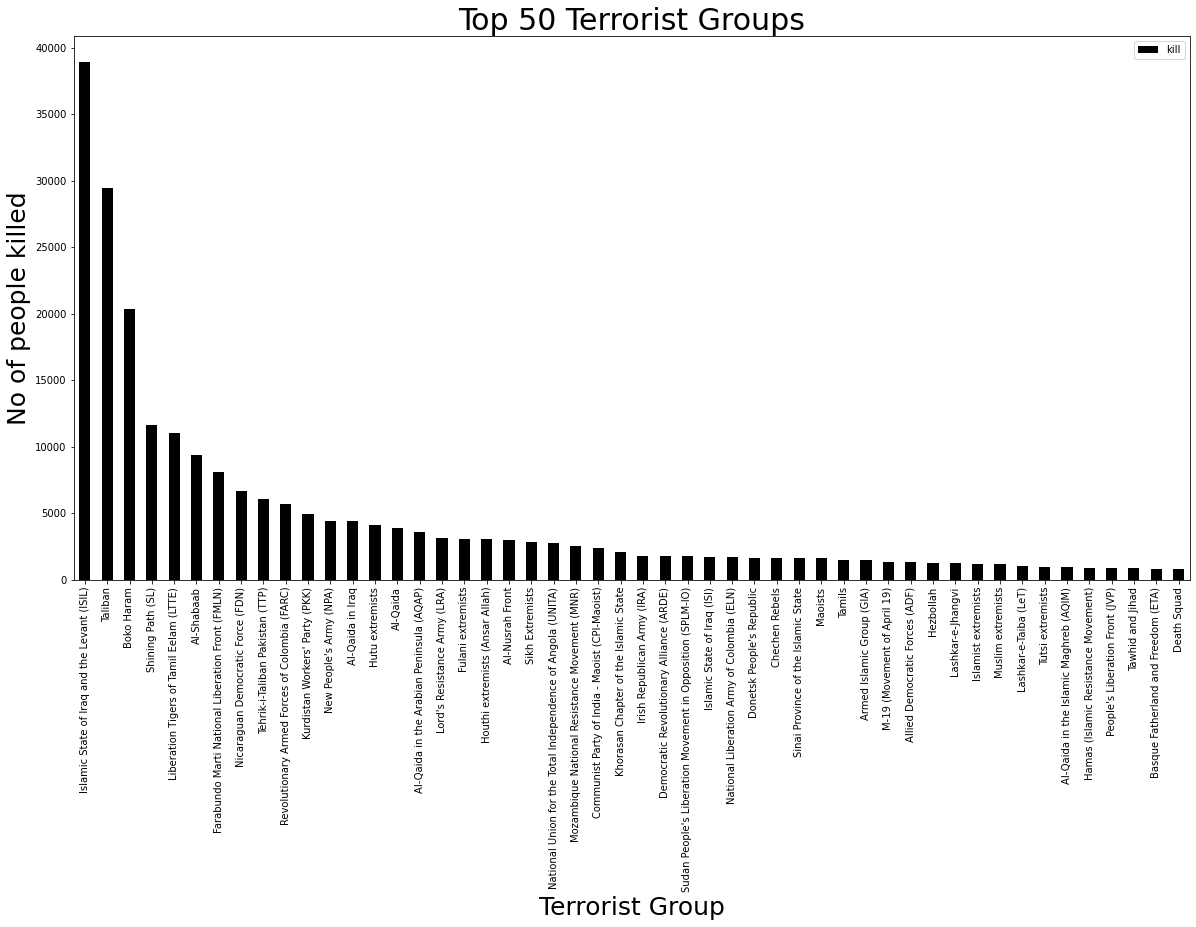

In [10]:
df[['Group', 'kill']].groupby(['Group']).sum().drop('Unknown').sort_values('kill', ascending = False).head(50).plot(kind = 'bar',color = 'black',figsize = (20, 10))
plt.title("Top 50 Terrorist Groups", fontsize = 30)
plt.xlabel("Terrorist Group", fontsize = 25)
plt.ylabel("No of people killed", fontsize = 25)
plt.show()

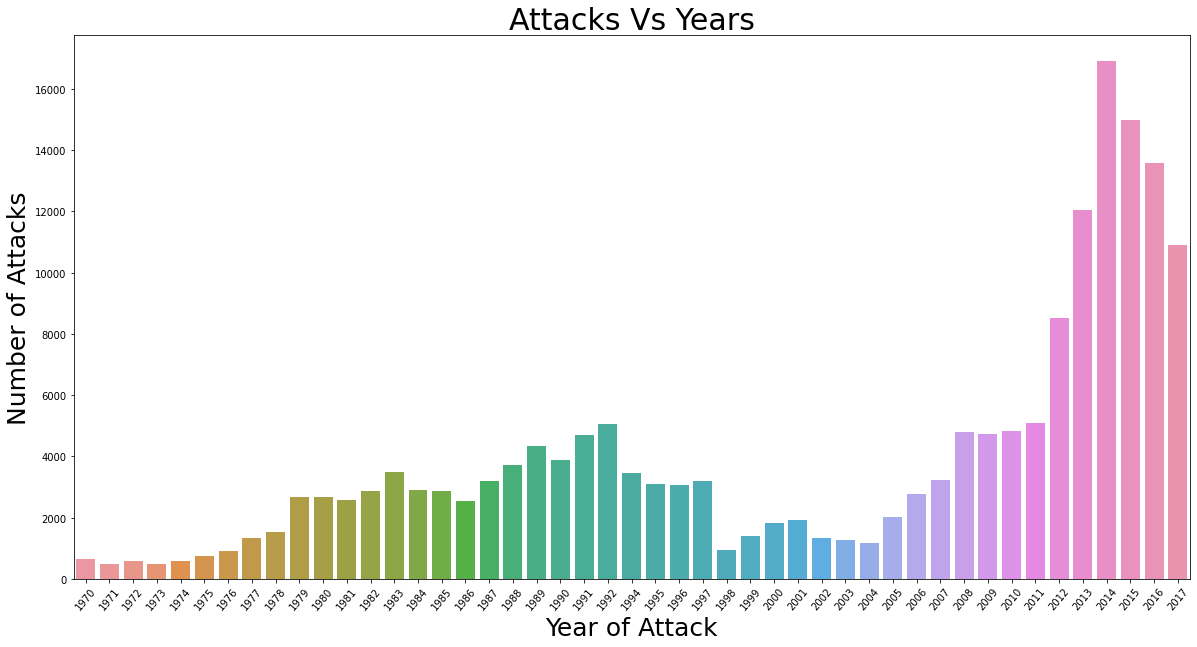

In [11]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = True).sort_index()
plt.figure(figsize = (20,10))
sns.barplot(x = year, y = years_count)
plt.xticks(rotation = 50)
plt.xlabel('Year of Attack', fontsize = 25)
plt.ylabel('Number of Attacks', fontsize = 25)
plt.title('Attacks Vs Years', fontsize = 30)
plt.show()

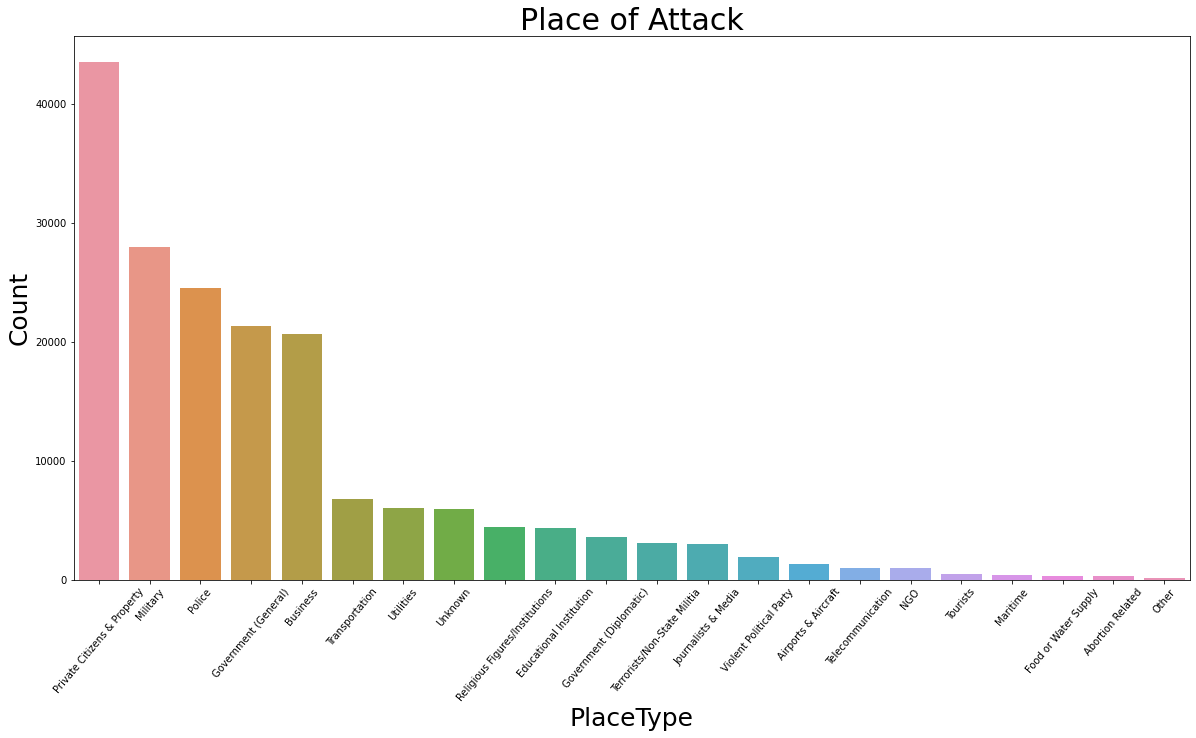

In [12]:
plt.subplots(figsize = (20, 10))
sns.countplot(df["Targettype"], order=df['Targettype'].value_counts().index);
plt.xticks(rotation = 50)
plt.xlabel("PlaceType", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Place of Attack", fontsize = 30)
plt.show()

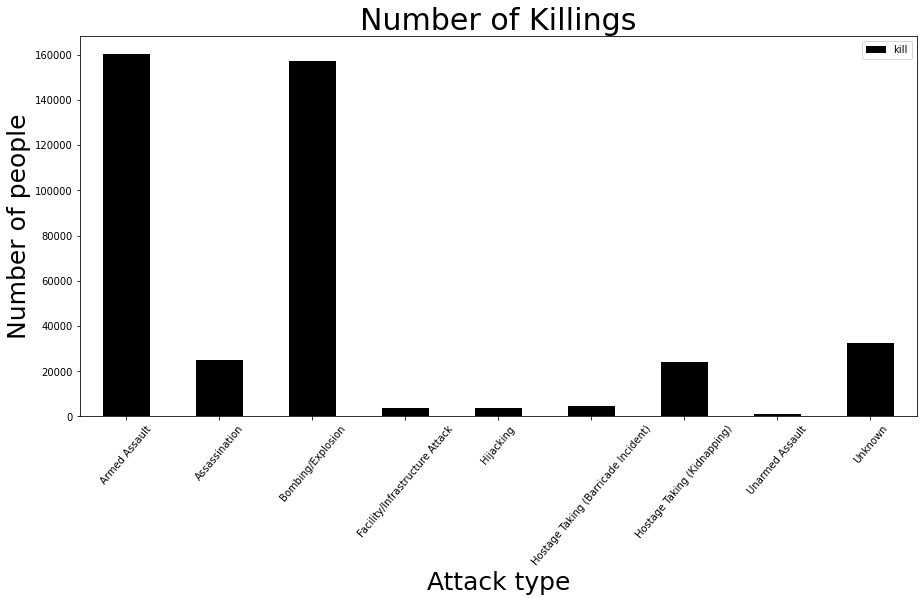

In [13]:
df = df[['Attacktype', 'kill']].groupby(["Attacktype"],axis = 0).sum().plot(kind = 'bar',figsize = (15,7),color = ['black'])
plt.xticks(rotation = 50)
plt.title("Number of Killings", fontsize = 30)
plt.ylabel('Number of people', fontsize = 25)
plt.xlabel('Attack type', fontsize = 25)
plt.show()

